In [5]:
from sklearn.tree import DecisionTreeClassifier
import copy

# bootstrap

In [6]:
def subset_indices(n, m=None):
    
    # Samples m numbers uniformly at random with replacement from 0,...,n-1 : bootstrap of size m
    if m is not None:
        indices = np.floor(np.random.rand(m)*n).astype(int)
    # If m not specified, random (non-empty) subset is returned
    else:
        indices = np.nonzero(np.round(np.random.rand(n)))[0]
        if indices.shape[0] == 0:
            indices = subset_indices(n)
        
    return indices

In [7]:
def sample_data(X, y, bootstrap_size=None, random_features=False):
    # if bootstrap_size is None, then random subset returned
    data_indices = subset_indices(X.shape[0], bootstrap_size)
    if random_features:
        feature_indices = subset_indices(X.shape[1])
        X_sample = X[data_indices, feature_indices]
        X_sample = np.reshape(X_sample, (data_indices.shape[0],feature_indices.shape[0]))
    else:
        X_sample = X[data_indices, :]
        feature_indices = np.array(range(X.shape[1]))
    y_sample = y[data_indices]
    
    return X_sample, y_sample, data_indices, feature_indices

# bagging

In [38]:
from tqdm import tqdm_notebook as tqdm

In [39]:
def bagging(X_train, y_train, X_trust, y_trust, clf, ensemble_size, bootstrap_size=None, random_features=False):
    
    clf_list = []
    counts = np.zeros((X_trust.shape[0], X_train.shape[0]))
    total_counts = np.zeros((X_trust.shape[0], X_train.shape[0]))
    
    data_indices_X = np.zeros((ensemble_size, X_train.shape[0]))
    outputs_y = np.zeros((ensemble_size, X_trust.shape[0]))

    
    for i in tqdm(range(ensemble_size)):
        X_sample, y_sample, data_indices, feature_indices = sample_data(X_train, y_train, bootstrap_size, random_features)
        clf.fit(X_sample, y_sample)
        y_trust_pred = clf.predict(X_trust)
#         print(y_trust_pred.shape)
        clf_list.append(copy.copy(clf))
        
        for k in range(data_indices.shape[0]):
            data_indices_X[i][data_indices[k]] += 1
        
        for j in range(X_trust.shape[0]):
            # misclassified trusted item
            for k in range(data_indices.shape[0]):
                total_counts[j][data_indices[k]] += 1
            
            if(y_trust[j] != y_trust_pred[j]): 
                outputs_y[i][j] = 1
                for k in range(data_indices.shape[0]):
                    counts[j][data_indices[k]] += 1
                    
    return np.divide(counts,total_counts), data_indices_X, outputs_y         

In [41]:
ensemble_size = 5000
bootstrap_size = X_train.shape[0]//5
clf = DecisionTreeClassifier()
counts_dt, data_indices_X_dt, outputs_y_dt = bagging(X_train, y_train, X_trust, y_trust, clf, ensemble_size, bootstrap_size)
print(counts_dt)


[[0.60910816 0.60623782 0.61791045 0.59899497 0.56041667 0.72558594
  0.60135135 0.57924528 0.72485207 0.59060403 0.60059465 0.58678501
  0.61661945 0.63409771 0.62025316 0.62201454 0.58757062 0.601
  0.62208713 0.62102218 0.61918329 0.5966634  0.61246349 0.60794297
  0.6246122  0.57869934 0.58765916 0.59394572 0.60237389 0.58783121
  0.58308157 0.6029703  0.62159329 0.63468992 0.64107677 0.60555005
  0.5913219  0.57563452 0.63241525 0.60443996 0.71963563 0.60245902
  0.6147541  0.64391691 0.6276704  0.61909548 0.61066398 0.58163265
  0.54124748 0.64748201 0.59715158 0.64427625 0.6        0.6227027
  0.6257732  0.61306533 0.60789981 0.61015228 0.60437376 0.5952381
  0.629667   0.5942029  0.60721649 0.60245902 0.60055096 0.58714703
  0.69362993 0.63934426 0.61061061 0.63213531 0.61127895 0.62118126
  0.66375969 0.56339468 0.63219616 0.60673077 0.55947137 0.59247967
  0.63041289 0.57792836 0.44287159 0.63578947 0.56769826 0.64205128
  0.58267717 0.6435743  0.42735949 0.62888666 0.609657

  0.13981763 0.14285714]]


In [42]:
num_pts = 5
plot_points(X_train, y_train, counts_dt, num_pts, X_trust, y_trust)

NameError: name 'plot_points' is not defined

In [98]:
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
def ovr_classifier(data_indices_X, outputs_y):
    
    est_clf = LogisticRegression(solver='lbfgs')
#     est_clf = MLPClassifier()

    ovr_clf = OneVsRestClassifier(est_clf)
    
    ovr_clf.fit(data_indices_X, outputs_y)
    
#     print(nn_clf.coefs_)
    
    X = np.identity(data_indices_X.shape[1])
    preds = ovr_clf.predict_proba(X)
    
    return preds
    

[(81, 0.8381218609483599), (61, 0.8318542970537354), (71, 0.8262816645579789), (52, 0.712751122925059), (62, 0.6791019448097325), (96, 0.6614082183463659), (98, 0.6579280309472612), (34, 0.6485661149057984), (76, 0.639982617249947), (82, 0.6363477711457678), (25, 0.6354525331344146), (66, 0.6337233605402727), (88, 0.6327164418728901), (79, 0.6258032711618456), (90, 0.6202072831828234), (41, 0.6173187281593369), (74, 0.6150946981309763), (8, 0.6139378812060154), (9, 0.6138643722724716), (93, 0.6118514510918501), (57, 0.6118083437690718), (23, 0.6086732411585561), (6, 0.6086001847750229), (36, 0.6076556413682656), (45, 0.6066868249857326)]


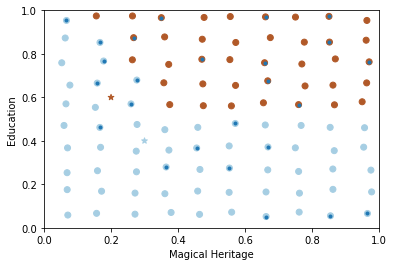

In [172]:
preds_dt = ovr_classifier(data_indices_X_dt, outputs_y_dt).T
num_pts = 25
plot_points(X_train, y_train, preds_dt, num_pts, X_trust, y_trust)

## With Kernel LR

In [102]:
def create_graph(bootstrap_size):
    g3 = tf.Graph()
    with g3.as_default():
        lam_tf3 = tf.placeholder(tf.float32)
        K_tf3 = tf.placeholder(tf.float32, [bootstrap_size, bootstrap_size])
        y_tf3 = tf.placeholder(tf.float32, [bootstrap_size,1])

        alpha_tf3 = tf.Variable(tf.zeros((bootstrap_size,1)))

        logistic_loss3 = tf.reduce_mean(-tf.log_sigmoid(y_tf3*tf.matmul(K_tf3, alpha_tf3)))
        reg_loss3 = 0.5*lam_tf3*tf.matmul(tf.matmul(alpha_tf3, K_tf3, transpose_a = True),alpha_tf3)
        loss3 = logistic_loss3 + reg_loss3
        opt3 = tf.train.AdamOptimizer().minimize(loss3)
        init3 = tf.initializers.global_variables()
        
    return g3, opt3, alpha_tf3, logistic_loss3, reg_loss3, loss3, init3, lam_tf3, K_tf3, y_tf3

In [103]:
ensemble_size = 1000
bootstrap_size = 100
g3, opt3, alpha_tf3, logistic_loss3, reg_loss3, loss3, init3, lam_tf3, K_tf3, y_tf3 = create_graph(bootstrap_size)
clf = classifier_model()
counts_kr, data_indices_X_kr, outputs_y_kr = bagging(X_train, y_train, X_trust, y_trust, clf, ensemble_size, bootstrap_size)
# print(counts_kr)

[(41, 1.0), (60, 1.0), (31, 0.9989816700610998), (81, 0.9989572471324296), (89, 0.9979591836734694), (12, 0.9971724787935909), (50, 0.9970355731225297), (51, 0.9970119521912351), (42, 0.996993987975952), (6, 0.9969574036511156), (22, 0.9969293756397134), (70, 0.9969040247678018), (90, 0.9961501443695862), (93, 0.996003996003996), (43, 0.9959595959595959), (85, 0.9959555106167847), (54, 0.9959141981613892), (62, 0.9953139643861293), (30, 0.9951409135082604), (80, 0.9951171875), (47, 0.9950445986124876), (40, 0.995), (2, 0.9949392712550608), (24, 0.9948559670781894), (68, 0.9945770065075922)]
(100, 2) (100,)


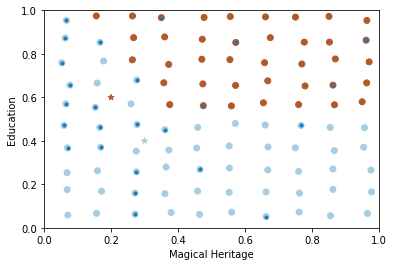

In [229]:
num_pts = 25
plot_points(X_train, y_train, counts_kr, num_pts, X_trust, y_trust)

[(41, 0.7384880157863566), (81, 0.7323338189329879), (85, 0.7096005810519771), (12, 0.7083878495094715), (89, 0.7049503043146549)]


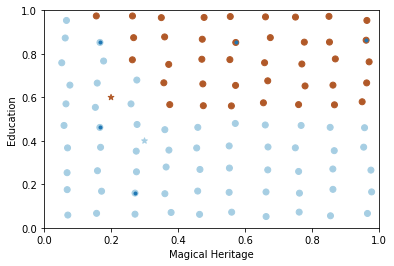

In [109]:
preds_kr = nn_classifier(data_indices_X_kr, outputs_y_kr).T
num_pts = 5
plot_points(X_train, y_train, preds_kr, num_pts, X_trust, y_trust)

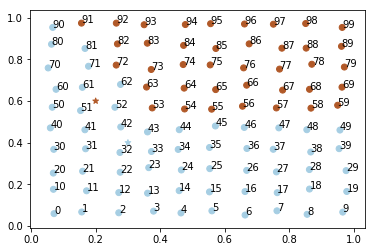

In [144]:
harry_potter_plot(X_train, y_train, X_trust, y_trust)

(Index of bug, TP, FP)
(81,1,0), (61,2,0), (71,3,0), (52,4,0), (62,5,0), (96,5,1), (98,5,2), (34,5,3), (76,5,4), (82,5,5), (25,5,6), (66,5,7), (88,5,8), (79,5,9), (90,6,9), (41,6,10), (74,6,11), (8,6,12), (9,6,13), (93,6,14), (57,6,15), (23,6,16), (6,6,17), (36,6,18), (45,6,19), (70,7,19), (94,7,20), (63,7,21), (59,7,22), (58,7,23), (28,7,24), (22,7,25), (2,7,26), (3,7,27), (75,7,28), (99,7,29), (83,7,30), (48,7,31), (44,7,32), (33,7,33), (60,8,33), (53,8,34), (73,8,35), (35,8,36), (54,8,37), (85,8,38), (38,8,39), (0,8,40), (69,8,41), (67,8,42), (95,8,43), (1,8,44), (11,8,45), (37,8,46), (80,9,46), (26,9,47), (55,9,48), (39,9,49), (5,9,50), (7,9,51), (13,9,52), (65,9,53), (78,9,54), (87,9,55), (89,9,56), (64,9,57), (10,9,58), (68,9,59), (51,10,59), (18,10,60), (56,10,61), (91,10,62), (21,10,63), (19,10,64), (77,10,65), (84,10,66), (12,10,67), (32,10,68), (47,10,69), (49,10,70), (20,10,71), (17,10,72), (14,10,73), (30,10,74), (86,10,75), (92,10,76), (27,10,77), (97,10,78), (72,10,79), (

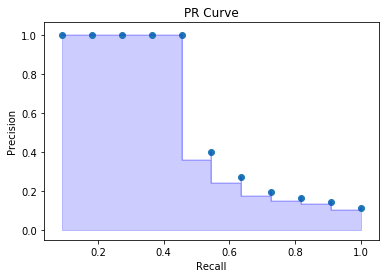

In [277]:
plot_pr_curve(preds_dt,bugs)

[0.46985757 0.48093739 0.481932   0.48374057 0.49441137 0.49968431
 0.50006358 0.50032266 0.50047691 0.50073698 0.50276425 0.50357564
 0.50533748 0.50669186 0.50751392 0.50765021 0.50924557 0.51262669
 0.51273931 0.51381766 0.51395315 0.51607543 0.51828428 0.51867501
 0.51888749 0.51895518 0.5200884  0.52553143 0.52593989 0.53372015
 0.53475001 0.53692656 0.53748868 0.53905884 0.54177643 0.54213559
 0.5425869  0.54353761 0.54464286 0.54623768 0.54916767 0.54937004
 0.55037198 0.55246348 0.55254535 0.55426315 0.55567153 0.55569372
 0.55714254 0.55796336 0.55840507 0.55880134 0.56010561 0.56047032
 0.56123403 0.5618172  0.56587807 0.56751648 0.5677393  0.56928133
 0.57017351 0.57682697 0.57688924 0.57760162 0.58289209 0.58993309
 0.59080567 0.59210424 0.59353977 0.59574406 0.60353611 0.60364606
 0.60644936 0.60668682 0.60765564 0.60860018 0.60867324 0.61180834
 0.61185145 0.61386437 0.61393788 0.6150947  0.61731873 0.62020728
 0.62580327 0.63271644 0.63372336 0.63545253 0.63634777 0.6399

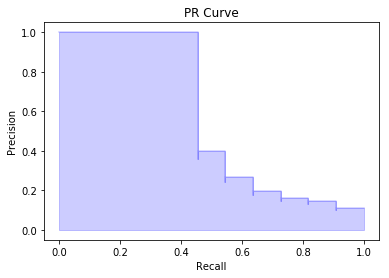

In [278]:
sklearn_pr_curve(preds_dt[1], bugs)

# plotting

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import precision_recall_curve as pr_curve
from sklearn.utils.fixes import signature

In [44]:
def harry_potter_plot(X_train, y_train, X_trust, y_trust):
    
    fig, ax = plt.subplots()
    
    if len(y_train.shape)==2:
        y_train = np.reshape(y_train,(y_train.shape[0],))
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o')
    
    if X_trust is not None:
        if len(y_trust.shape)==2:
            y_trust = np.reshape(y_trust,(y_trust.shape[0],))
        ax.scatter(X_trust[:, 0], X_trust[:, 1], c=y_trust, cmap=plt.cm.Paired, marker='*')
    
    for i in range(X_train.shape[0]):
        ax.annotate(i, (X_train[i][0], X_train[i][1]))

In [45]:
def plot_points(X_train, y_train, counts, num_pts, X_trust=None, y_trust=None):
    a = counts[1]
    duo = [(i,a[i]) for i in range(a.shape[0])]
    duo.sort(key=lambda x: x[1], reverse=True)
    print(duo[:num_pts])
    indices = [duo[i][0] for i in range(num_pts)]
    
    
    if len(y_train.shape)==2:
        y_train = np.reshape(y_train,(y_train.shape[0],))
    
    plt.figure()
    print(X_train.shape, y_train.shape)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o')
    
    plt.scatter(X_train[indices, 0], X_train[indices, 1], marker='.')
    
    if X_trust is not None:
        if len(y_trust.shape)==2:
            y_trust = np.reshape(y_trust,(y_trust.shape[0],))
        plt.scatter(X_trust[:, 0], X_trust[:, 1], c=y_trust, cmap=plt.cm.Paired, marker='*')
    
    plt.xlabel('Magical Heritage')
    plt.ylabel('Education')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.draw()
    plt.show()

In [90]:
# ----------------------------------------
# For plotting data and decision boundary
def plot_model(X_train, y_train, clf, X_trust=None, y_trust=None, title=None):
    print(clf)
    if len(y_train.shape)==2:
        y_train = np.reshape(y_train,(y_train.shape[0],))
    
    X = np.zeros((10000,2))
    a = np.linspace(0,1,100)
    b = np.linspace(0,1,100)
    e, d = np.meshgrid(a, b)
    X[:,0] = np.reshape(e,(10000,))
    X[:,1] = np.reshape(d,(10000,))

    Z = clf.predict(X)
    probs = clf.predict_proba(X)
    if len(probs.shape)==2:
        probs = probs[:,probs.shape[1]-1]
    probs = probs.reshape(e.shape)

    plt.figure()

    # Put the result into a color plot
    Z = Z.reshape(e.shape)
    plt.contour(e, d, probs, levels=[0.5])

    # Plot the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, marker='.')
    
    # Plot the trusted points
    if X_trust is not None:
        if len(y_trust.shape)==2:
            y_trust = np.reshape(y_trust,(y_trust.shape[0],))
        plt.scatter(X_trust[:, 0], X_trust[:, 1], c=y_trust, cmap=plt.cm.Paired, marker='*')

    if title is not None:
        plt.title(str(title))

    plt.xlabel('Magical Heritage')
    plt.ylabel('Education')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.draw()

# Kernel LR Model

In [91]:
import tensorflow as tf
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
from tqdm import tqdm_notebook

In [92]:
g1 = tf.Graph()
with g1.as_default():
    lam_tf = tf.placeholder(tf.float32)
    K_tf = tf.placeholder(tf.float32, [100, 100])
    y_tf = tf.placeholder(tf.float32, [100, 1])

    alpha_tf = tf.Variable(tf.zeros((100, 1)))

    logistic_loss = tf.reduce_mean(-tf.log_sigmoid(y_tf*tf.matmul(K_tf, alpha_tf)))
    reg_loss = 0.5*lam_tf*tf.matmul(tf.matmul(alpha_tf, K_tf, transpose_a = True),alpha_tf)
    loss = logistic_loss + reg_loss
    opt = tf.train.AdamOptimizer().minimize(loss)
    init = tf.initializers.global_variables()

In [93]:
g2 = tf.Graph()
with g2.as_default():
    lam_tf2 = tf.placeholder(tf.float32)
    K_tf2 = tf.placeholder(tf.float32, [99, 99])
    y_tf2 = tf.placeholder(tf.float32, [99,1])

    alpha_tf2 = tf.Variable(tf.zeros((99,1)))

    logistic_loss2 = tf.reduce_mean(-tf.log_sigmoid(y_tf2*tf.matmul(K_tf2, alpha_tf2)))
    reg_loss2 = 0.5*lam_tf2*tf.matmul(tf.matmul(alpha_tf2, K_tf2, transpose_a = True),alpha_tf2)
    loss2 = logistic_loss2 + reg_loss2
    opt2 = tf.train.AdamOptimizer().minimize(loss2)
    init2 = tf.initializers.global_variables()

In [94]:
class classifier_model:


    def fit(self,X_train,y_train,lam=1e-3,verbose=False):
        
        self.X_train = X_train
        K_train = rbf_kernel(X_train, X_train, gamma)
       
        
        n = K_train.shape[0]
#         print(n)

        tf.reset_default_graph()

        if n==100:
#             print("Graph 1")
            with tf.Session(graph=g1) as sess:
                sess.run(init)

                prevloss = np.inf
                c = 0
                while True:
                    _,self.alpha,ll,rl, l = sess.run([opt, alpha_tf, logistic_loss, reg_loss, loss], 
                                feed_dict={K_tf: K_train, y_tf:y_train, lam_tf: lam})
                    c += 1
                    if abs((prevloss - l)/l) < 5e-4:
                        if verbose:
                            print("Iterations for convergence:",c, "Loss: ", l)
                        break
#                     if c%100==0:
#                         print(c, ll, rl, l, prevloss)

                    prevloss = l

        if n==99:
    #         print("Graph 2")

            with tf.Session(graph=g2) as sess:
                sess.run(init2)

                prevloss = np.inf
                c = 0
                while True:
                    _,self.alpha,ll,rl, l = sess.run([opt2, alpha_tf2, logistic_loss2, reg_loss2, loss2], 
                                feed_dict={K_tf2: K_train, y_tf2:y_train, lam_tf2: lam})
                    c += 1
                    if abs((prevloss - l)/l) < 5e-4:
                        if verbose:
                            print("Iterations for convergence:",c, "Loss: ", l)
                        break
        #             if c%1000==0:
        #                 print(c, ll, rl, l, prevloss)

                    prevloss = l
            
        if n==bootstrap_size:
#             print("Graph 3")
            with tf.Session(graph=g3) as sess:
                sess.run(init3)

                prevloss = np.inf
                c = 0
                while True:
                    _,self.alpha,ll,rl, l = sess.run([opt3, alpha_tf3, logistic_loss3, reg_loss3, loss3], 
                                feed_dict={K_tf3: K_train, y_tf3:y_train, lam_tf3: lam})
                    c += 1
                    if abs((prevloss - l)/l) < 5e-4:
                        if verbose:
                            print("Iterations for convergence:",c, "Loss: ", l)
                        break
        #             if c%1000==0:
        #                 print(c, ll, rl, l, prevloss)

                    prevloss = l
            
#         print("fitted", self.alpha)


    def predict(self, X):
#         print(self.alpha.shape)
        K = rbf_kernel(X, self.X_train, gamma)
        pred = np.dot(K,self.alpha)
        pred_proba = 1/(1+np.exp(-pred))
        pred = np.sign(pred)
        return pred

    def predict_proba(self, X):
        K = rbf_kernel(X, self.X_train, gamma)
        pred = np.dot(K,self.alpha)
        pred_proba = 1/(1+np.exp(-pred))
        return pred_proba
        

3


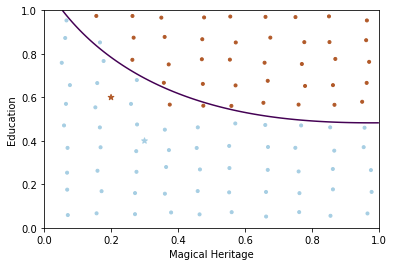

In [95]:
clf = classifier_model()
clf.fit(X_train, y_train)
pred = clf.predict(X_train)
print(np.count_nonzero(pred-y_train))
plot_model(X_train, y_train, clf, X_trust, y_trust)

9
LogisticRegression(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


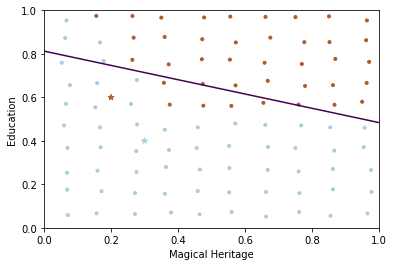

In [105]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear', C=1, dual=True, max_iter=1000)
clf.fit(X_train, np.ravel(y_train))
pred = clf.predict(X_train)
print(np.count_nonzero(pred-np.ravel(y_train)))
plot_model(X_train, y_train, clf, X_trust, y_trust)

3
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


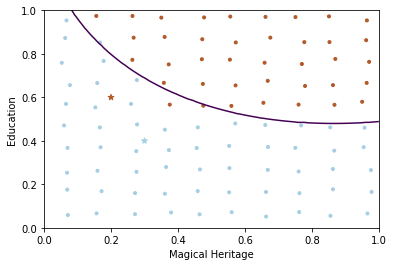

In [106]:
from sklearn.svm import SVC
clf = SVC(probability=True, gamma='auto', C=10)
clf.fit(X_train, np.ravel(y_train))
pred = clf.predict(X_train)
print(np.count_nonzero(pred-np.ravel(y_train)))
plot_model(X_train, y_train, clf, X_trust, y_trust)

# HarryPotter

In [62]:
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel

In [63]:
# for reproducibility, fix the random seed 
np.random.seed(123)

# the learner is hard coded to be kernel logistic regression.
# learner's parameters:
sigma = 0.4	# RBF kernel bandwidth
gamma = (1/(2.0*sigma**2))
lam = 1e-3

In [64]:
################### Harry Potter Toy Example ##################

# ----------------------------------------
# Generate "dirty" training data. 
# that is, we will plant some "historical bias" 
# in the form of labels: the Ministry of Magic refused to hire
# muggle-born graduates with high edcuation.

print("Creating training data...\n")

# Training Set size
n = 100 

# data points are on a uniform grid, then dithered with a Gaussian.
# x_1=magic heritage; x_2=education

X_train = np.zeros((n,2))
a = np.linspace(0.05, 0.95, num=int(np.sqrt(n)))
e, d = np.meshgrid(a, a)
X_train[:,0] = np.reshape(e,(n,))
X_train[:,1] = np.reshape(d,(n,))
X_train = X_train + 0.03*np.random.rand(n,2)

# the noiseless 'desired' label obeys y = sign(x_2 - 0.5)
y_clean = np.sign(X_train[:,1]-0.5)
y_clean = np.reshape(y_clean,(y_clean.shape[0],1))
# print(y_clean)

y_train = np.copy(y_clean)
y_train[(X_train[:,1]<(4*(X_train[:,0]-0.5)**2+0.5)) & (X_train[:,0]<0.5)] = -1
# print(y_train-y_clean)

Creating training data...



In [65]:
bugs = y_train-y_clean
bugs[bugs!=0] = 1
np.count_nonzero(bugs)

11

In [66]:
# --------------------------------------------------------------
# Generate trusted data
# we manually picked these two trusted items for pedagogical purpose
print("Creating trusted data...\n")

X_trust = np.array([[0.3, 0.4],[0.2, 0.6]])
y_trust = np.sign(X_trust[:,1]-0.5)
y_trust = np.reshape(y_trust,(y_trust.shape[0],1))
m = y_trust.shape[0]
c_value = 100  # Confidence parameters on trusted items are set to 100.
c = c_value*np.ones((m,1))

Creating trusted data...



In [67]:
# y[y==-1] = 0
# y_tilde[y_tilde==-1] = 0

In [68]:
print(X_train.shape, y_train.shape, X_trust.shape, y_trust.shape)

(100, 2) (100, 1) (2, 2) (2, 1)


In [69]:
K_train = rbf_kernel(X_train, X_train, gamma)
K_trust = rbf_kernel(X_trust, X_train, gamma)

In [70]:
print(K_train.shape,K_trust.shape)

(100, 100) (2, 100)


# Bias against young women

In [107]:
import numpy as np

In [108]:
################### Bias Against Young Women Toy Example ##################

# ----------------------------------------
# Generate "dirty" training data. 
# that is, we will plant some "historical bias" 
# in the form of labels: women under the age of 35 are 
# less likely to be hired than men of similar skill level

# for reproducibility, fix the random seed 
# 90,190 works well
np.random.seed(190)

print("Creating training data...\n")

# Training Set size
n = 200 

# x_0=age; chosen randomly between 22 and 55
# x_1=skill level; random integer number between 0 and 100
# x_2=gender; 0=man, 1=woman


X_train = np.zeros((n,3))

X_train[:n//2,2] = np.zeros((n//2,))
X_train[n//2:n,2] = np.ones((n//2,))

ages = np.random.randint(22, 56, size=(n//2,))
X_train[:n//2,0] = ages
X_train[n//2:n,0] = ages + np.random.randint(-10, 11, size=(n//2,))
X_train[n//2:n,0] = np.random.randint(22, 56, size=(n//2,))

skills = np.random.randint(15, 95, size=(n//2,))
X_train[:n//2,1] = skills
X_train[n//2:n,1] = skills + np.random.randint(-10, 11, size=(n//2,))
X_train[n//2:n,1] = np.random.randint(15, 95, size=(n//2,))


np.random.shuffle(X_train)

# Optimal Hiring rule: Skill/Age > 2
y_clean = np.sign(0.7*X_train[:,1] - X_train[:,0] + 1e-7)
# y_clean = np.reshape(y_clean,(y_clean.shape[0],1))

# Introducing bugs in dataset
y_train = np.copy(y_clean)
y_train[(0.35*X_train[:,1] - X_train[:,0]<0) & (X_train[:,2]==1) & (X_train[:,0]<35)] = -1
# print(y_train-y_clean)

Creating training data...



In [109]:
print(np.count_nonzero(y_clean==1), " Hired Overall")
print(np.count_nonzero(y_clean==-1), " Not Hired Overall")

89  Hired Overall
111  Not Hired Overall


In [110]:
true_bugs = y_train-y_clean
true_bugs[true_bugs!=0] = 1
np.sum(true_bugs)

19.0

In [111]:
true_bugs.shape

(200,)

In [112]:
X_train.shape

(200, 3)

In [113]:
X_bugs = X_train[np.ravel(true_bugs)==1,:]
X_bugs.shape

(19, 3)

In [114]:
X_bugs

array([[22., 34.,  1.],
       [29., 74.,  1.],
       [29., 81.,  1.],
       [31., 85.,  1.],
       [31., 77.,  1.],
       [31., 70.,  1.],
       [23., 49.,  1.],
       [26., 43.,  1.],
       [31., 46.,  1.],
       [34., 69.,  1.],
       [30., 46.,  1.],
       [34., 51.,  1.],
       [32., 71.,  1.],
       [34., 67.,  1.],
       [30., 64.,  1.],
       [34., 65.,  1.],
       [22., 40.,  1.],
       [28., 78.,  1.],
       [27., 43.,  1.]])

In [115]:
np.count_nonzero(true_bugs)

19

In [116]:
# --------------------------------------------------------------
# Generate trusted data
# we manually picked these two trusted items for pedagogical purpose
print("Creating trusted data...\n")
X_trust = np.array([[30,60,1],[27,53,0],[38,45,0],[43,55,1]])
y_trust = np.sign(0.7*X_trust[:,1] - X_trust[:,0] + 1e-7)
y_trust

Creating trusted data...



array([ 1.,  1., -1., -1.])

In [117]:
def women_bias_plot(X_train, y_train, X_trust=None, y_trust=None, bugs=None, title=None):
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    print("Legend:")
    print("Brown: Hired, Blue: Not Hired")
    print("Circle: Men, Cross: Women")
    print("Star: Trusted Men, Plus: Trusted Women")
    print("Dark Blue Dots: Bugs")

    
    if len(y_train.shape)==2:
        y_train = np.reshape(y_train,(y_train.shape[0],))
        if bugs is not None:
            bugs = np.reshape(bugs,(bugs.shape[0],))
    
    ax.scatter(X_train[X_train[:,2]==0, 0], X_train[X_train[:,2]==0, 1], c=y_train[X_train[:,2]==0], 
               cmap=plt.cm.Paired, marker='o', s=50)
    ax.scatter(X_train[X_train[:,2]==1, 0], X_train[X_train[:,2]==1, 1], c=y_train[X_train[:,2]==1], 
               cmap=plt.cm.Paired, marker='X', s=50)

    
    if X_trust is not None:
        if len(y_trust.shape)==2:
            y_trust = np.reshape(y_trust,(y_trust.shape[0],))
        ax.scatter(X_trust[X_trust[:,2]==0, 0], X_trust[X_trust[:,2]==0, 1], c=y_trust[X_trust[:,2]==0], 
                   cmap=plt.cm.Paired, marker='*', s=100)
        ax.scatter(X_trust[X_trust[:,2]==1, 0], X_trust[X_trust[:,2]==1, 1], c=y_trust[X_trust[:,2]==1], 
                   cmap=plt.cm.Paired, marker='P', s=100)
        for i in range(X_trust.shape[0]):
            ax.annotate(i, (X_trust[i][0], X_trust[i][1]))
        
        
    if bugs is not None:
        buggy = X_train[bugs==1,:]
        ax.scatter(buggy[:, 0], buggy[:, 1], marker='.', s=30)
    
    plt.xlabel('Age')
    plt.ylabel('Skill')
    if title:
        plt.title(title)

    
#     for i in range(X_train.shape[0]):
#         ax.annotate(i, (X_train[i][0], X_train[i][1]))

Legend:
Brown: Hired, Blue: Not Hired
Circle: Men, Cross: Women
Star: Trusted Men, Plus: Trusted Women
Dark Blue Dots: Bugs


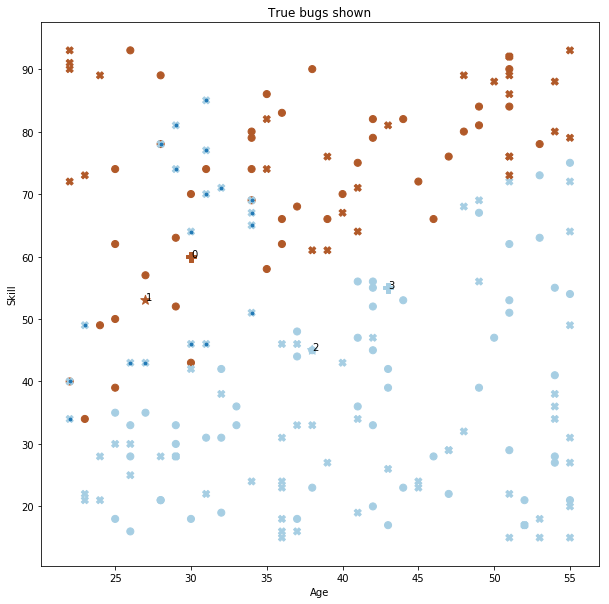

In [118]:
women_bias_plot(X_train, y_train, X_trust, y_trust, true_bugs,'True bugs shown')

In [119]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

Classifier Used: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy: 1.0
Legend:
Brown: Hired, Blue: Not Hired
Circle: Men, Cross: Women
Star: Trusted Men, Plus: Trusted Women
Dark Blue Dots: Bugs
Trusted item 0 misclassified
Trusted item 1 misclassified


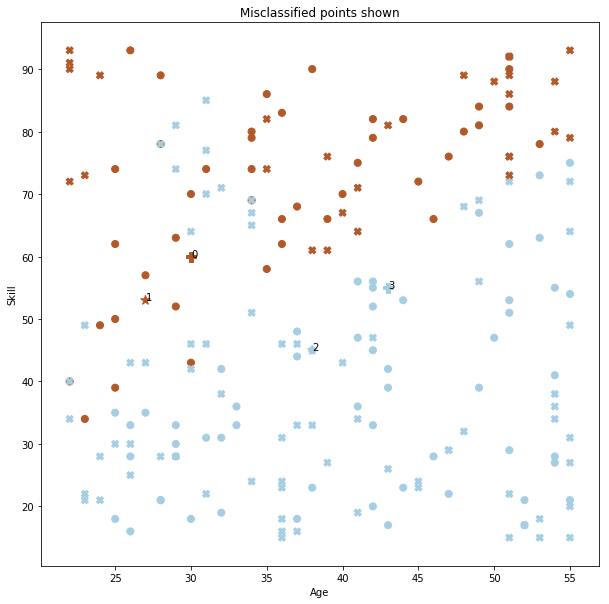

In [152]:
ensemble_size = 5000
bootstrap_size = X_train.shape[0]//5

clf_list = [DecisionTreeClassifier(), LogisticRegression(solver='lbfgs'), 
           SVC(probability=True, gamma='auto', C=10), GaussianNB(),
           KNeighborsClassifier()]

clf_ind = 2

print("Classifier Used:",clf_list[clf_ind])
clf = clf_list[clf_ind]

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
wrong = np.zeros(y_train.shape)
wrong[y_train!=y_train_pred] = 1
acc = 1 - np.count_nonzero(y_train-y_train_pred)/y_train.shape[0]
print("Accuracy:",acc)

women_bias_plot(X_train, y_train, X_trust, y_trust, wrong, 'Misclassified points shown')

y_trust_pred = clf.predict(X_trust)
misclass = []
for j in range(X_trust.shape[0]):
    # misclassified trusted item
    if(y_trust[j] != y_trust_pred[j]): 
        misclass.append(j)
        print("Trusted item %d misclassified"%j)

counts_dt, data_indices_X_dt, outputs_y_dt = bagging2(X_train, y_train, X_trust, y_trust, clf, ensemble_size, bootstrap_size)
# print(counts_dt)

[(96, 0.9909274193548387), (121, 0.9895337773549001), (12, 0.9893410852713178), (8, 0.9889224572004028), (40, 0.988517745302714), (5, 0.9880239520958084), (28, 0.9877175025588536), (27, 0.9872340425531915), (71, 0.9871912168344007), (61, 0.9870259481037924)]
Legend:
Brown: Hired, Blue: Not Hired
Circle: Men, Cross: Women
Star: Trusted Men, Plus: Trusted Women
Dark Blue Dots: Bugs
[(112, 0.9311064718162839), (27, 0.9308510638297872), (33, 0.9307992202729045), (193, 0.9298067141403866), (128, 0.9297520661157025), (63, 0.9295499021526419), (44, 0.928714859437751), (8, 0.9284994964753273), (37, 0.9272369714847591), (182, 0.9266666666666666)]
Legend:
Brown: Hired, Blue: Not Hired
Circle: Men, Cross: Women
Star: Trusted Men, Plus: Trusted Women
Dark Blue Dots: Bugs


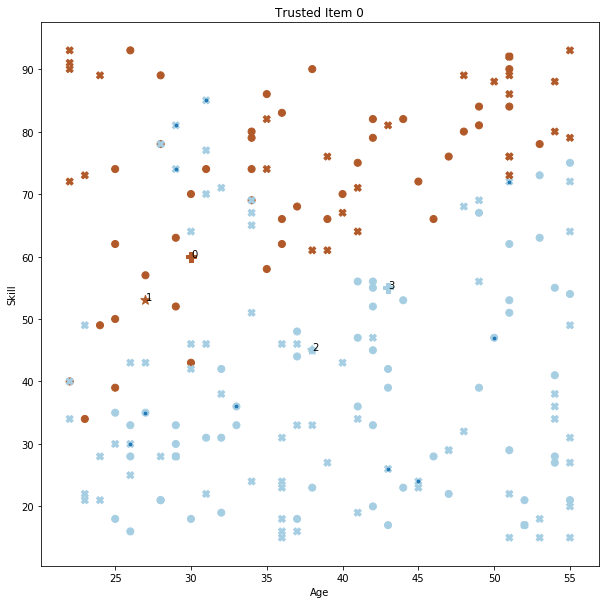

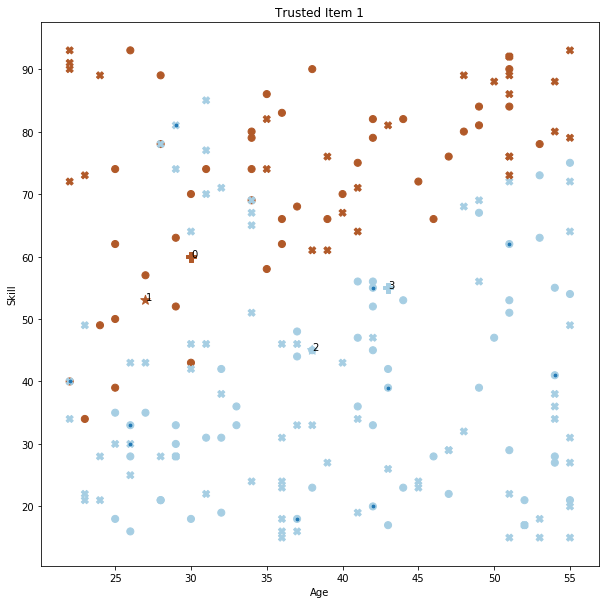

In [153]:
num_pts = 10
for ind in misclass:
    plot_points_gender_bias(X_train, y_train, counts_dt, ind, num_pts, X_trust, y_trust, 'Trusted Item %d'%ind)

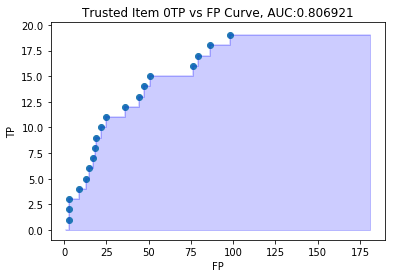

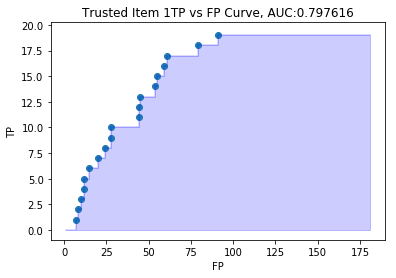

In [155]:
for ind in misclass:
    pr = False
    plot_pr_curve(counts_dt, ind, true_bugs, PR=pr, title='Trusted Item %d'%ind)

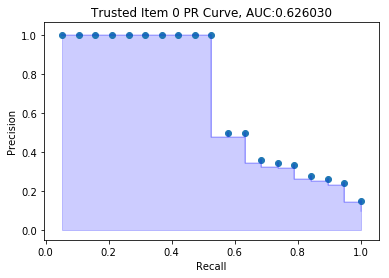

In [150]:
preds_dt = ovr_classifier(data_indices_X_dt, outputs_y_dt).T
for ind in misclass:
# for ind in range(counts_dt.shape[0]):
    pr = True
    plot_pr_curve(preds_dt, ind, true_bugs, PR=pr, title='Trusted Item %d '%ind)

In [135]:
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
def ovr_classifier(data_indices_X, outputs_y):
    
    est_clf = LogisticRegression(solver='lbfgs')
#     est_clf = MLPClassifier()

    ovr_clf = OneVsRestClassifier(est_clf)
    
    ovr_clf.fit(data_indices_X, outputs_y)
    
#     print(nn_clf.coefs_)
    
    X = np.identity(data_indices_X.shape[1])
    preds = ovr_clf.predict_proba(X)
    
    return preds
    

In [129]:
def bagging2(X_train, y_train, X_trust, y_trust, clf, ensemble_size, bootstrap_size=None, random_features=False):
    
    counts = np.zeros((X_trust.shape[0], X_train.shape[0]))
    total_counts = np.zeros((X_trust.shape[0], X_train.shape[0]))
    
    data_indices_X = np.zeros((ensemble_size, X_train.shape[0]))
    outputs_y = np.zeros((ensemble_size, X_trust.shape[0]))

    for i in tqdm(range(ensemble_size)):
        X_sample, y_sample, data_indices, feature_indices = sample_data(X_train, y_train, bootstrap_size, random_features)
        clf.fit(X_sample, y_sample)
        y_trust_pred = clf.predict(X_trust)
#         print(y_trust_pred.shape)
        
        for k in range(data_indices.shape[0]):
            data_indices_X[i][data_indices[k]] += 1
        
        for j in range(X_trust.shape[0]):
            # misclassified trusted item
            for k in range(data_indices.shape[0]):
                total_counts[j][data_indices[k]] += 1
            
            if(y_trust[j] != y_trust_pred[j]): 
                outputs_y[i][j] = 1
                for k in range(data_indices.shape[0]):
                    counts[j][data_indices[k]] += 1
                    
    return np.divide(counts,total_counts), data_indices_X, outputs_y         

In [130]:
def plot_points_gender_bias(X_train, y_train, counts, ind, num_pts, X_trust=None, y_trust=None, title=None):
    a = counts[ind]
    duo = [(i,a[i]) for i in range(a.shape[0])]
    duo.sort(key=lambda x: x[1], reverse=True)
    print(duo[:num_pts])
    indices = [duo[i][0] for i in range(num_pts)]
    
    bugs = np.zeros(X_train.shape[0])
    bugs[indices] = 1
    women_bias_plot(X_train, y_train, X_trust, y_trust, bugs, title=title)

In [131]:
def sklearn_pr_curve(metric, bugs):
    precision, recall, thres = pr_curve(bugs, metric)
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    
    print(thres)
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR Curve')

In [137]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
def plot_pr_curve(metric, ind, bugs, PR=True, title=None):
    # precision = tp/(tp+fp)
    # recall = tp/(tp + fn)
    precision = []
    recall = []
    tp_list = []
    fp_list = []
    found = [[],[]]
    num_bugs = np.sum(bugs)
    
    tp = 0
    fp = 0
    
    a = metric[ind]
    duo = [(i,a[i]) for i in range(a.shape[0])]
    duo.sort(key=lambda x: x[1], reverse=True)
#     print("(Index of bug, TP, FP)")

    for ind,_ in duo:
        
        if(bugs[ind]==1):
            tp += 1
        else:
            fp += 1
        tp_list.append(tp)
        fp_list.append(fp)
        
        pr = tp/(tp+fp)
        re = tp/num_bugs
#         print("(%d,%d,%d)"%(ind,tp,fp), end=", ")
        precision.append(pr)
        recall.append(re)
        
        if(bugs[ind]==1):
            if PR:
                found[0].append(re)
                found[1].append(pr)
            else:
                found[0].append(fp)
                found[1].append(tp)
        
    plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    
    if PR:
        x = recall
        y = precision
        t = 'PR Curve, AUC:%f'
        x_label = 'Recall'
        y_label = 'Precision'
        total_area = 1
    else:
        x = fp_list
        y = tp_list
        t = 'TP vs FP Curve, AUC:%f'
        x_label = 'FP'
        y_label = 'TP'
        total_area = tp*fp
    
    area = metrics.auc(x, y)/total_area
    plt.step(x, y, color='b', alpha=0.2, where='post')
    plt.fill_between(x, y, alpha=0.2, color='b', **step_kwargs)
    
    plt.scatter(found[0], found[1])
    
    t = t%area
    if title:
        t = title + t
    plt.title(t)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
        